# Deep Neural network
### Genesis Quiles-Galarza

We're going to generate a set of $\mathcal{N}$ observations using a Latin Hypercube Sampling of

\begin{equation}
f(x,y) = \cos(\pi x)\cos(\pi y), x, y \in [50,54]^2
\end{equation}

and train a deep neural network with two hidden layers, 50 neurons per layer, and a hyperbolic tangent activation function to approximate $f(x,y)$. We'll plot the approximation error in the relative 
$\mathbb{L}_2$ norm as the number of training points is increased.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pyDOE import *
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [5]:
def get_obs(N):
    #Generate the list of noisy observations
    x = lhs(1,N)
    y = lhs(1,N)
    x = 4*x+50
    y = 4*y+50
    x=x.flatten()
    y=y.flatten()
    observations = np.cos(np.pi*x)*np.cos(np.pi*y) # f(x,y)
    coord = [x,y]
    coord = np.array(coord)
    X = torch.from_numpy(coord).type(torch.FloatTensor)
    observations = torch.from_numpy(observations).type(torch.FloatTensor)
    X = X.t()
    X = (X - torch.mean(X))/torch.std(X)
    observations = (observations - torch.mean(observations))/torch.std(observations)
    return X, observations


def make_plots3(f_test,f_pred,loss):
    fig, ax = plt.subplots()
    plt.plot(loss)
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.show()
    
    #Create parity plot #This one isn't working...
    #fix, ax = plt.subplots()
    #plt.scatter(f_test,f_pred)
    #plt.xlabel('Testing Data')
    #plt.ylabel('Predictions')
    #plt.title('Parity Plot')
    #plt.show()
    
def nn_model3(N):
    lr = 0.002
    X, obs = get_obs(N)
    # create instance of Logistic Regression class
    typ = 'tanh' # choosing activation function as tanh()
    L = 2 # choosing two hidden layers 
    Q = [50,50] # each hidden layer will have 50 neurons
    nnmod3 = NeuralNetwork(2,1,L,Q,typ)
    # Train the data
    err, w0, b0, w1, b1, w2, b2 = nnmod3.train(X,obs,lr)
    #Get some test data
    X_test, f_test = get_obs(N)
    # Get the accuracy of the model
    accuracy, f_pred = nnmod3.predictTest(X_test,f_test,w0, b0, w1, b1, w2, b2)
    loss = nnmod3.loss_track
    print("The training loss using",N,"observations is:", err)
    f_test = f_test.data.numpy()
    f_pred = np.transpose(f_pred)
    make_plots3(f_test,f_pred,loss) #not sure why this isn't working
    return accuracy

def make_L2_plot(N,L2):
    fig,ax = plt.subplots(figsize=(8,6))
    fig1 = ax.plot(N,L2)
    ax.set_xlabel('N')
    ax.set_ylabel('L2 Norm')
    plt.show()
    

Beginning iterations in Layer 0
Completed 2500 iterations in Layer 0
Beginning iterations in Layer 1
Completed 2500 iterations in Layer 1
Beginning iterations in Layer 2
Completed 2500 iterations in Layer 2
Completed neural network training. Time elapsed: 6.27s
The training loss using 500 observations is: 0.003939409


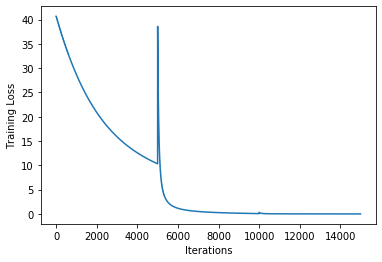

In [6]:
N_list = []
err_list = []

N=500
acc = nn_model3(N)
N_list.append(N)
err_list.append(acc)

Beginning iterations in Layer 0
Completed 5000 iterations in Layer 0
Beginning iterations in Layer 1
Completed 5000 iterations in Layer 1
Beginning iterations in Layer 2
Completed 5000 iterations in Layer 2
Completed neural network training. Time elapsed: 18.26s
The training loss using 1000 observations is: 0.0019746826


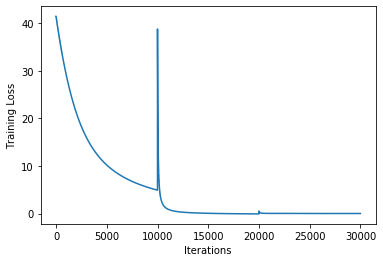

In [7]:
N=1000
acc = nn_model3(N)
N_list.append(N)
err_list.append(acc)

Beginning iterations in Layer 0
Completed 7500 iterations in Layer 0
Beginning iterations in Layer 1
Completed 7500 iterations in Layer 1
Beginning iterations in Layer 2
Completed 7500 iterations in Layer 2
Completed neural network training. Time elapsed: 44.61s
The training loss using 1500 observations is: 0.0013188042


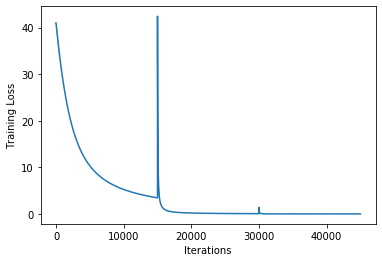

In [8]:
N=1500
acc = nn_model3(N)
N_list.append(N)
err_list.append(acc)

Beginning iterations in Layer 0
Completed 10000 iterations in Layer 0
Beginning iterations in Layer 1
Completed 10000 iterations in Layer 1
Beginning iterations in Layer 2
Completed 10000 iterations in Layer 2
Completed neural network training. Time elapsed: 89.29s
The training loss using 2000 observations is: 0.0009860492


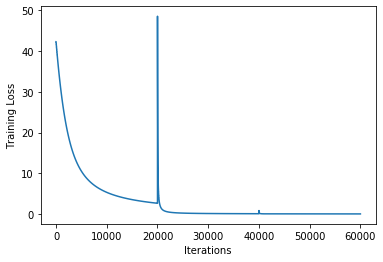

In [9]:
N=2000
acc = nn_model3(N)
N_list.append(N)
err_list.append(acc)

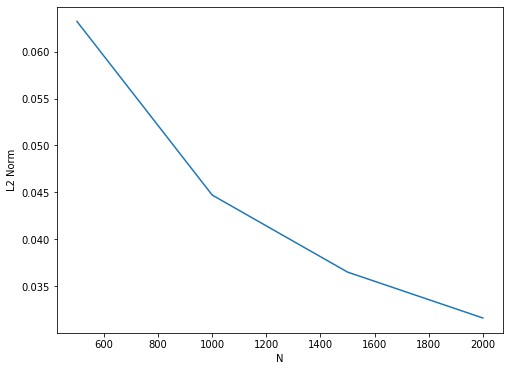

In [10]:
make_L2_plot(N_list,err_list)

For this model, the more training points that are included, the more accurate the model gets, which is to be expected. In this case, the L2-norm was reduced by half when the number of points was quadrupled. Depending on other factors, such as how to define the number of iterations or the optimization model, increasing the number of observations also makes the model considerably slower. In this case, the biggest N chosen was N=2000, because when I chose any N bigger than this, the Kernel died. To improve upon this, a better optimizer could be chosen, such as those mentioned above. The number of iterations required could also be limited by choosing a tolorance for which the model will consder to have been converged.